# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')
json_normalize(data, "info" )

,0
0,governor
1,governor


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#load the file from my desktop
raw= json.load((open('data/world_bank_projects.json')))

In [9]:
#turn the read file into a dataframe
world_bank = pd.read_json('data/world_bank_projects.json')

In [10]:
#to get a grasp of the data
world_bank.head()
world_bank.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [11]:
#taking a look of column data
world_bank[["countryname", "totalamt", "project_name", "lendprojectcost", "mjtheme_namecode"]].head(5)

,countryname,totalamt,project_name,lendprojectcost,mjtheme_namecode
0,Federal Democratic Republic of Ethiopia,130000000,Ethiopia General Education Quality Improvement...,550000000,"[{'code': '8', 'name': 'Human development'}, {..."
1,Republic of Tunisia,0,TN: DTF Social Protection Reforms Support,5700000,"[{'code': '1', 'name': 'Economic management'},..."
2,Tuvalu,6060000,Tuvalu Aviation Investment Project - Additiona...,6060000,"[{'code': '5', 'name': 'Trade and integration'..."
3,Republic of Yemen,0,Gov't and Civil Society Organization Partnership,1500000,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,Kingdom of Lesotho,13100000,Second Private Sector Competitiveness and Econ...,15000000,"[{'code': '5', 'name': 'Trade and integration'..."


In [12]:
#Probem 1
#Find the 10 countries with most projects

In [13]:
most_projects= world_bank["countryname"].value_counts().head(10)

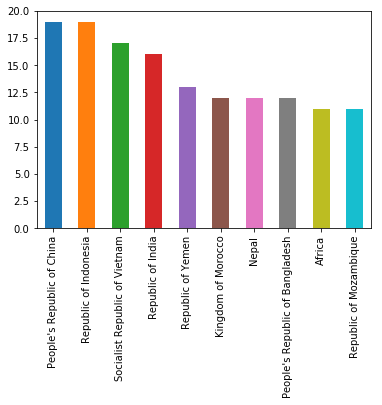

In [14]:
most_projects= most_projects.plot(kind= "bar", rot= 90)
most_projects.set_ylim([0,20])
plt.show()

In [15]:
#Probem 2
#Find the top 10 major project themes (using column 'mjtheme_namecode')
#In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
#normalize the mjtheme namecode
name_code = json_normalize(raw, 'mjtheme_namecode')
name_code.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [17]:
#fill in blanks with NaN
name_code.replace('', np.NaN, inplace= True)
name_code.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [18]:
#fill in number from code column to name column
name_code.name = name_code.name.fillna(value=name_code.code)

In [19]:
name_code.head()

,code,name
0,8,Human development
1,11,11
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [20]:
#dictionary mapping key-value pairs
#FIGURE OUT HOW TO CREATE A DICTIONARY FROM SCRATCH
dict = {"8": 'Human development',
 "11": 'Environment and natural resources management',
 "1": 'Economic management',
 "6": 'Social protection and risk management',
 "5": 'Trade and integration',
 "2": 'Public sector governance',
 "7": 'Social dev/gender/inclusion',
 "4": 'Financial and private sector development',
 "10": 'Rural development',
 "9": 'Urban development',
 "3": 'Rule of law'}

In [21]:
#fill in the code numbers with the correct name
name_code['name'].replace(dict, inplace=True)
name_code.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [22]:
#sorting the projects themes by name
name_code["name"].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

In [23]:
#check to see if it matches up with the numbers from the code number:
name_code["code"].value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

AttributeError: 'Series' object has no attribute 'set_xlabel'

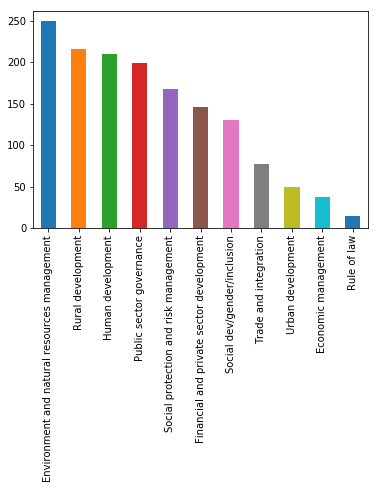

In [24]:
#plot the most frequent projects:

name_plot= name_code["name"].value_counts()
name_plot.plot(kind="bar", rot= 90)
name_plot.set_xlabel('Project Name')
name_plot.set_ylabel('Frequency')
name_plot.set_title("Most Common World Bank Projects")

plt.show()

In [ ]:
#for fun, the top ten biggest projects 
import matplotlib.pyplot as plt

#creating a smaller df & sorting based on loan amount
wb_biggest_loans= world_bank[["countryname", "totalamt", 'closingdate']]
wb_biggest_loans = wb_biggest_loans.sort_values("totalamt", ascending= False).head(10)

#Plotting & extra tweaks
wb_bigloan_plot =wb_biggest_loans.plot(kind= "bar", x= "countryname", y= "totalamt", rot= 90)
wb_bigloan_plot.set_title('Largest World Bank Loans')
wb_bigloan_plot.set_xlabel('Country Name')
wb_bigloan_plot.set_ylabel('Amount (in Billions of $USD)')
wb_bigloan_plot.set_ylim([20000000,1500000000])


#creating year labels to correspond to the country & loan
labels = list(wb_biggest_loans["closingdate"])
labels= [date[:4] for date in labels]
rects = wb_bigloan_plot.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    wb_bigloan_plot.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


plt.show()


In [ ]:
#verifying what numer it is
wb_biggest_loans[wb_biggest_loans["countryname"]== "Republic of Poland"]

In [ ]:
#How would you solve the missing data problem?

In [ ]:
#FIGURE OUT HOW TO CREATE A DICTIONARY OUT OF CODE!!


# #make a dictionary out of the values
# dict_name_code=name_code.T.to_dict("list")
# dict_name_code[1]= ["Economic management"]
# dict_name_code[6]= ["Social protection and risk management"]
# dict_name_code
# name_code['name'].update(pd.Series(dict_name_code))

# name_code.head()